In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
!head Consumer_Complaints.csv

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,
1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,
1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,
1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,
1388470,Consumer loan,Installment loan,Managing the loan or lease,,MA,01474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,
1388457,Debt collection,Medical,Disclosure verification of debt

In [4]:
complaints = pd.read_csv("Consumer_Complaints.csv", low_memory=False)

In [5]:
complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [6]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395853 entries, 0 to 395852
Data columns (total 14 columns):
Complaint ID            395853 non-null int64
Product                 395853 non-null object
Sub-product             271830 non-null object
Issue                   395847 non-null object
Sub-issue               122938 non-null object
State                   390362 non-null object
ZIP code                391368 non-null float64
Submitted via           395853 non-null object
Date received           395853 non-null object
Date sent to company    395853 non-null object
Company                 395853 non-null object
Company response        395853 non-null object
Timely response?        395853 non-null object
Consumer disputed?      364266 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 45.3+ MB


In [7]:
# complaints['Date received'].resample("M", how=["count"])  # Need to clean up the data first

In [8]:
# Create a dictionary for renaming, starting with blank values
{column: '' for column in complaints}

{'Company': '',
 'Company response': '',
 'Complaint ID': '',
 'Consumer disputed?': '',
 'Date received': '',
 'Date sent to company': '',
 'Issue': '',
 'Product': '',
 'State': '',
 'Sub-issue': '',
 'Sub-product': '',
 'Submitted via': '',
 'Timely response?': '',
 'ZIP code': ''}

In [9]:
renamed_columns = {'Company': 'company',
                   'Company response': 'response',
                   'Complaint ID': 'id',
                   'Consumer disputed?': 'disputed',
                   'Date received': 'received',
                   'Date sent to company': 'sent',
                   'Issue': 'issue',
                   'Product': 'Product',  # Capital to avoid overwriting product() function on dataframe
                   'State': 'state',
                   'Sub-issue': 'subissue',
                   'Sub-product': 'subproduct',
                   'Submitted via': 'via',
                   'Timely response?': 'timely',
                   'ZIP code': 'zip'}

In [10]:
complaints = complaints.rename(columns=renamed_columns)

In [11]:
complaints.head()

,id,Product,subproduct,issue,subissue,state,zip,via,received,sent,company,response,timely,disputed
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [12]:
#complaints.index = complaints.pop('id')

In [13]:
#pd.to_datetime(complaints.received)
#complaints['received'] = pd.to_datetime(complaints.pop('received'), format="%m/%d/%Y")

In [14]:
complaints.index = pd.to_datetime(complaints.pop('received'), format="%m/%d/%Y")

In [15]:
complaints.head()

,id,Product,subproduct,issue,subissue,state,zip,via,sent,company,response,timely,disputed
received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,NaN
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [16]:
complaints_monthly_count = complaints.id.resample('M', how='count')[:-1]
#complaints.zip.groupby(complaints.index).count().plot()

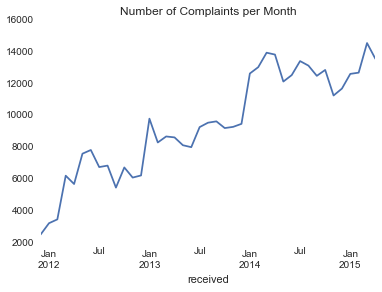

In [17]:
complaints_monthly_count.plot()
plt.title('Number of Complaints per Month')

In [18]:
# complaints.id.groupby(complaints.state).count()

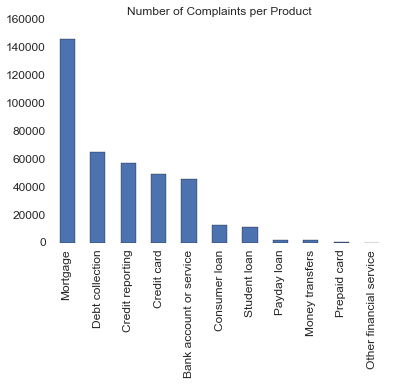

In [19]:
complaints.Product.value_counts().plot(kind='bar', fontsize=12)
plt.title('Number of Complaints per Product')

In [20]:
pd.DataFrame.plot?

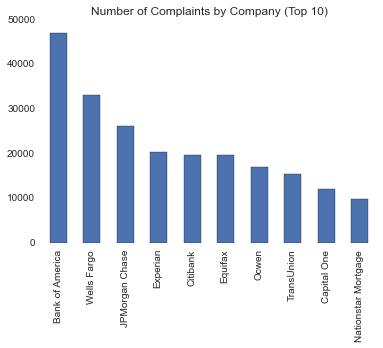

In [21]:
complaints.company.value_counts()[:10].plot(kind='bar')
#plt.ylabel('')
plt.title('Number of Complaints by Company (Top 10)')

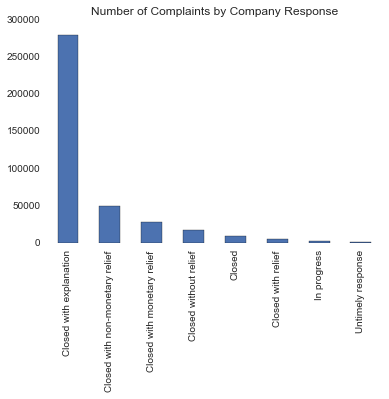

In [22]:
complaints.response.value_counts().plot(kind='bar')
#plt.ylabel('')
plt.title('Number of Complaints by Company Response')

In [23]:
dow = ["M", "Tu", "W", "Th", "F", "Sa", "Su"]
complaints["day_of_week"] = complaints.index.to_series().map(lambda d: d.weekday())

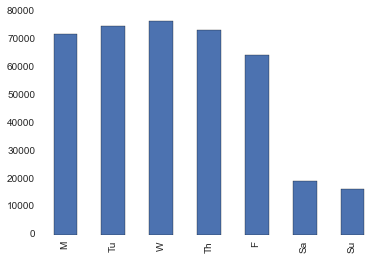

In [24]:
complaints_dow = complaints.day_of_week.value_counts() 
complaints_dow = complaints_dow.sort_index()
complaints_dow.index = dow
complaints_dow.plot(kind='bar')
#print(complaints_dow)
#complaints.groupby('day_of_week').mean()


##Hard Mode

In [25]:
# complaints.zip.value_counts()[:10].plot()

In [26]:
complaints.state.value_counts()

CA    58603
FL    38037
TX    28764
NY    27034
GA    17085
NJ    16113
PA    14188
IL    13808
VA    12736
MD    12720
OH    12323
NC    10871
MI    10779
AZ     8678
MA     8070
WA     8064
CO     6792
TN     5790
MO     5203
CT     4758
SC     4755
OR     4662
MN     4567
NV     4558
WI     4473
IN     4291
AL     3842
LA     3687
KY     2773
OK     2564
      ...  
DE     2105
UT     2086
NM     1907
KS     1907
MS     1755
AR     1670
IA     1610
HI     1434
RI     1427
ME     1402
ID     1308
NE     1255
WV      997
PR      831
VT      705
MT      655
SD      543
AK      478
WY      403
ND      324
AE      147
AP      113
VI       82
GU       40
MH       21
FM       21
MP       17
AS       13
AA       10
PW        8
dtype: int64

Data from http://www.census.gov/popest/data/state/totals/2013/index.html

In [27]:
!head NST-EST2013-01.csv

In [28]:
population = pd.read_csv("NST-EST2013-01.csv", header=3)[5:56] # could also use dropna for part of this
population = population.rename(columns={'Unnamed: 0': 'state'})
population.index = population.pop('state')

In [29]:
population

,Census,Estimates Base,2010,2011,2012,2013
state,,,,,,
.Alabama,"4,779,736","4,779,758","4,785,570","4,801,627","4,817,528","4,833,722"
.Alaska,"710,231","710,231","713,868","723,375","730,307","735,132"
.Arizona,"6,392,017","6,392,015","6,408,790","6,468,796","6,551,149","6,626,624"
.Arkansas,"2,915,918","2,915,916","2,922,280","2,938,506","2,949,828","2,959,373"
.California,"37,253,956","37,253,959","37,333,601","37,668,681","37,999,878","38,332,521"
.Colorado,"5,029,196","5,029,196","5,048,196","5,118,400","5,189,458","5,268,367"
.Connecticut,"3,574,097","3,574,097","3,579,210","3,588,948","3,591,765","3,596,080"
.Delaware,"897,934","897,936","899,711","907,985","917,053","925,749"
.District of Columbia,"601,723","601,767","605,125","619,624","633,427","646,449"


In [30]:
# from https://gist.github.com/mshafrir/2646763
state_abbreviations = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District Of Columbia",
    "FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    "GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PW": "Palau",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "DC": "District of Columbia"
}
abbrev = {str('.' + value):key for key, value in state_abbreviations.items()}

In [31]:
population = population.rename(index=abbrev)

In [32]:
population = population['2013']

In [33]:
#complaints_by_state = complaints.groupby('state')

In [34]:
# complaints_by_state["population"] = population


In [35]:
population = population.to_frame()

In [36]:
state_complaints = complaints.state.value_counts().sort_index().to_frame()
state_complaints

,0
AA,10
AE,147
AK,478
AL,3842
AP,113
AR,1670
AS,13
AZ,8678
CA,58603
CO,6792


In [37]:
state_complaints_filtered = state_complaints.join(population).dropna()

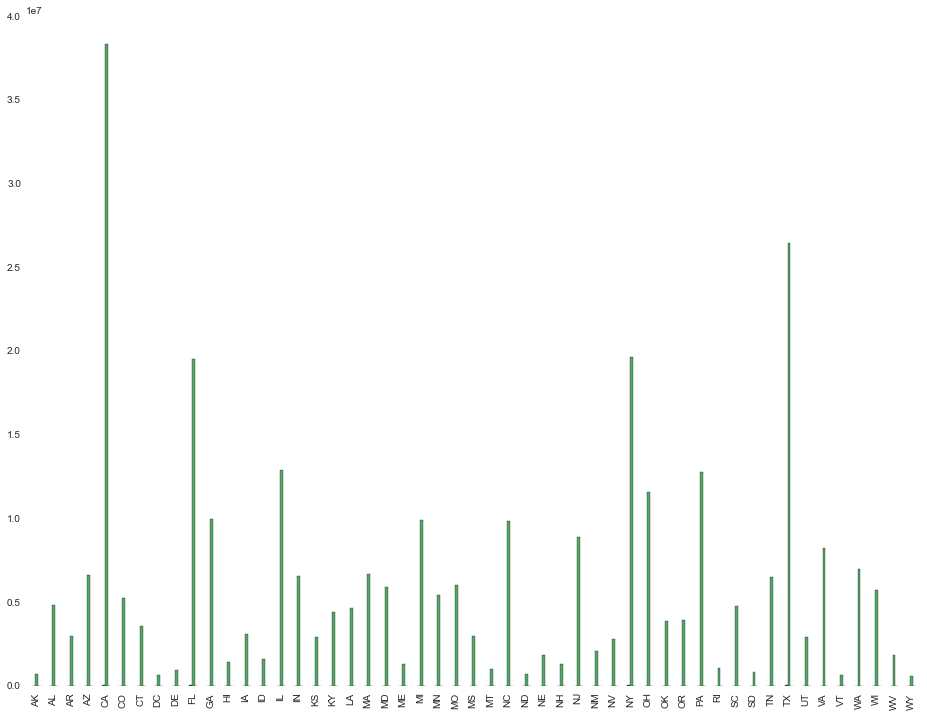

In [68]:
plt.figure(figsize=(12,10))
state_complaints_filtered.plot(kind='bar')
plt.legend('')
# plt.rcParams['figure.figsize'] = 16, 12 
# f.set_figheight(15)  #in order to have large plots, uncomment this and let it error one time
# f.set_figwidth(15)

In [67]:
state_complaints_filtered = state_complaints_filtered.rename(columns={0: 'complaints', '2013': 'population'})
state_complaints_filtered.head()

,complaints,population,per_capita
AK,478,735132,0.000650
AL,3842,4833722,0.000795
AR,1670,2959373,0.000564
AZ,8678,6626624,0.001310
CA,58603,38332521,0.001529


In [40]:
per_capita = state_complaints_filtered
per_capita['complaints'] = state_complaints_filtered.complaints.astype('int')
per_capita['population'] = state_complaints_filtered.population.replace({',':''}, regex=True).astype('int')
per_capita['per_capita'] = per_capita.complaints / per_capita.population
per_capita.head()

,complaints,population,per_capita
AK,478,735132,0.000650
AL,3842,4833722,0.000795
AR,1670,2959373,0.000564
AZ,8678,6626624,0.001310
CA,58603,38332521,0.001529


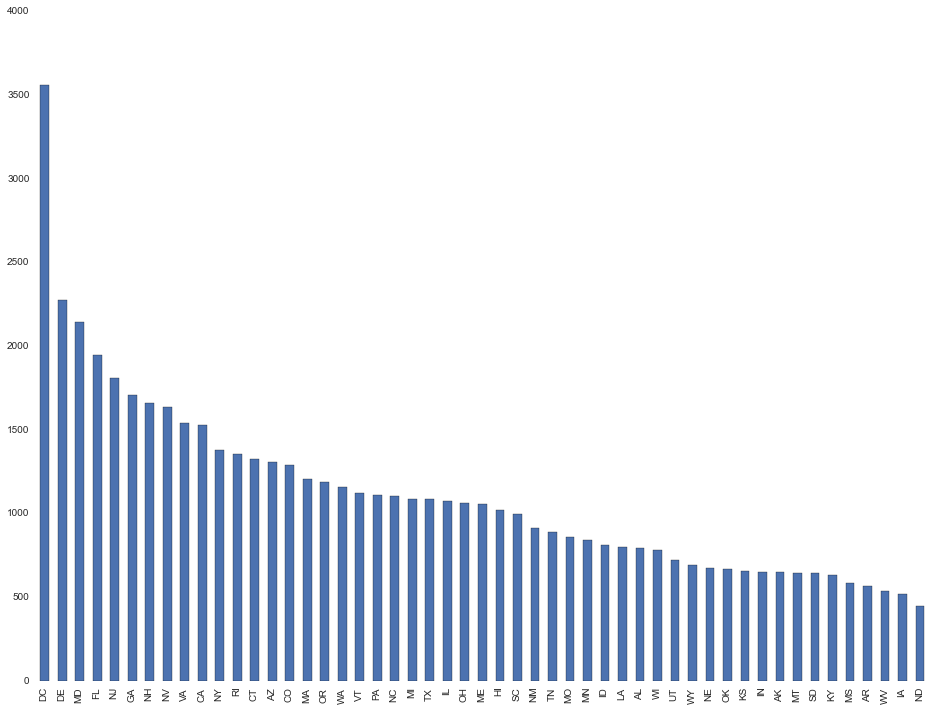

In [69]:
complaints_per_capita = state_complaints_filtered.complaints * 1000000 / state_complaints_filtered.population
complaints_per_capita.order(ascending=False, inplace=True)
complaints_per_capita.round().plot(kind='bar')
cpc = complaints_per_capita.round()

In [46]:
c_by_zip = complaints
c_by_zip.index = c_by_zip.pop('zip')
complaints.response.value_counts().plot(kind='bar')

In [56]:
c_by_zip[c_by_zip.index < 1000].count()

id             1273
Product        1273
subproduct      666
issue          1273
subissue        525
state           894
via            1273
sent           1273
company        1273
response       1273
timely         1273
disputed       1170
day_of_week    1273
dtype: int64

In [43]:
import vincent
import pandas as pd
import random


In [70]:
#Map Data Binding
import json
import pandas as pd
#Map the county codes we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('us_states.topo.json', 'r') as f:
    get_id = json.load(f)

In [74]:
#states = pd.read_json('us_states.topo.json')
#states.head()
# import json
# from pprint import pprint

# with open('us_states.topo.json') as json_data:
#     d = json.load(json_data)
#     json_data.close()
#     pprint(d)

In [78]:
#A little FIPS code munging
new_geoms = []
for geom in get_id['objects']['us_states.geo']['geometries']:
    #geom['properties']['NAME'] = int(geom['properties']['NAME'])
    new_geoms.append(geom)
new_geoms

##counties json looked like:
#{"type":"Topology","objects":{"us_counties.geo":{"type":"GeometryCollection","crs":{"type":"name","properties":{"name":"urn:ogc:def:crs:OGC:1.3:CRS84"}},"geometries":[{"type":"MultiPolygon","properties":{"FIPS":"22051"},"arcs":[[[0,1,2,3,-4,4,5,6,7,-8,8,9]],[[10,11,12,13,14,15,16,17,18]]]},{"type":"MultiPolygon","properties":{"FIPS":"53073"},"arcs":[[[19,20]],[[21,22]],[[-22,23,24,25,26]],[[27]],[[28,29,30,31,32,33,-34,33,34,35,36,37,38]]]},{"type":"Polygon","properties":{"FIPS":"30105"},"arcs":[[39,40,41,42,43,44,45,46,47,47,48,49,50,51,52,53,54,55,56,57,58,-56,59,60,61,62,63,64,65,66,67,68,69,70,71]]},{"type":"Polygon","properties":{"FIPS":"30029"},"arcs":[[72,73,-74,73,74,75,-76,75,76,-77,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,-96,95,96,97,98,99,-100,99,100,101,-102,101,102,103,103,103,104,105,106,107,108,109,-110,109,110,111,112,113,-114,113,114,115,116,117,118,119,120,121,122,123,124,-125,124,125,126,127,128,129,130,131,-132,131,-132,131,132,133]]},{"type":"Polygon","properties":{"FIPS":"16021"},"arcs":
##states:
#{"type":"Topology","objects":{"us_states.geo":{"type":"GeometryCollection","geometries":[{"type":"Polygon","properties":{"NAME":"Arizona"},"arcs":[[0,1,2,3,4,5,6]]},{"type":"Polygon","properties":{"NAME":"Arkansas"},"arcs":[[7,8,9,10,11,12,13,14]]},{"type":"MultiPolygon","properties":{"NAME":"California"},"arcs":[[[15]],[[16]],[[17]],[[18]],[[19]],[[20]],[[21]],[[22,23]],[[24,25,-5,3,-3,26,27,28,29]]]},{"type":"Polygon","propertiesd ":{"NAME":"Colorado"},"arcs":[[30,31,32,33,34,35]]},{"type":"Polygon","properties":{"NAME":"Connecticut"},"arcs":[[36,37,38,39,40,41]]},{"type":"Polygon","properties":{"NAME":"District of Columbia"},"arcs":[[42,43]]},{"type":"Polygon","properties":{"NAME":"Georgia"},"arcs":[[44,45,46,47,48,49]]},{"type":"MultiPolygon","properties":{"NAME":"Hawaii"},"arcs":[[[50]],[[51]],[[52]],[[53]],[[54]],[[55]],[[56]],[[57]],[[58]]]},{"type":"Polygon","properties":{"NAME":"Illinois"},"arcs":[[59,60,61,62,63,-64,64,65,66,67,68,69,70,71]]},{"type":"Polygon","properties":{"NAME":"Indian

[{'arcs': [[0, 1, 2, 3, 4, 5, 6]],
  'properties': {'NAME': 'Arizona'},
  'type': 'Polygon'},
 {'arcs': [[7, 8, 9, 10, 11, 12, 13, 14]],
  'properties': {'NAME': 'Arkansas'},
  'type': 'Polygon'},
 {'arcs': [[[15]],
   [[16]],
   [[17]],
   [[18]],
   [[19]],
   [[20]],
   [[21]],
   [[22, 23]],
   [[24, 25, -5, 3, -3, 26, 27, 28, 29]]],
  'properties': {'NAME': 'California'},
  'type': 'MultiPolygon'},
 {'arcs': [[30, 31, 32, 33, 34, 35]],
  'properties': {'NAME': 'Colorado'},
  'type': 'Polygon'},
 {'arcs': [[36, 37, 38, 39, 40, 41]],
  'properties': {'NAME': 'Connecticut'},
  'type': 'Polygon'},
 {'arcs': [[42, 43]],
  'properties': {'NAME': 'District of Columbia'},
  'type': 'Polygon'},
 {'arcs': [[44, 45, 46, 47, 48, 49]],
  'properties': {'NAME': 'Georgia'},
  'type': 'Polygon'},
 {'arcs': [[[50]],
   [[51]],
   [[52]],
   [[53]],
   [[54]],
   [[55]],
   [[56]],
   [[57]],
   [[58]]],
  'properties': {'NAME': 'Hawaii'},
  'type': 'MultiPolygon'},
 {'arcs': [[59, 60, 61, 62, 63, 

In [147]:
get_id['objects']['us_states.geo']['geometries'] = new_geoms

with open('us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_states.geo']['geometries']
state_codes = [x['properties']['NAME'] for x in geometries]
state_df = pd.DataFrame({'NAME': state_codes}, dtype=str)
state_df = state_df.astype(str)
state_df.head()

,NAME
0,Arizona
1,Arkansas
2,California
3,Colorado
4,Connecticut


In [148]:
state_names = {'NAME': {key[1:]: value for key, value in abbrev.items()}}
state_df = state_df.replace(to_replace=state_names)
state_df.head()

,NAME
0,AZ
1,AR
2,CA
3,CO
4,CT


In [149]:
#Read into Dataframe, cast to string for consistency
# df = pd.read_csv('data/us_county_data.csv', na_values=[' '])
# df['FIPS_Code'] = df['FIPS'].astype(str)

#Perform an inner join, pad NA's with data from nearest county
#cpc = cpc.to_frame()

In [150]:
cpc.rename(columns={0:'complaints_per_megacapita'}, inplace=True)
# cpc['NAME'] = cpc.index
# merged = pd.merge(cpc, state_df, on='NAME', how='outer')
# merged = merged.fillna(method='pad')

In [159]:
cpc.reset_index().pop('NAME').to_frame()
merged = pd.merge(cpc, state_df, on='NAME', how='outer')
merged = merged.fillna(method='pad')
merged['complaints_per_megacapita'] = merged.pop('complaints_per_megacapita')

In [160]:
merged.head()

,NAME,complaints_per_megacapita
0,DC,3558
1,DE,2274
2,MD,2145
3,FL,1945
4,NJ,1811


In [164]:
state_topo = r'us_states.topo.json'

geo_data = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}]


vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100, projection='albersUsa',
          data_bind='complaints_per_megacapita', data_key='NAME',
          map_key={'states': 'properties.NAME'}, brew='YlGnBu')


# vis = vincent.Map(geo_data=geo_data, scale=1000, projection='albersUsa')
#vis.marks[0].properties.update.fill.value = '#084081'
#vis.marks[0].properties.enter.stroke.value = '#7bccc4'
vis
# vis.scales[0].type='threshold'
# vis.scales[0].domain = [thresh for thresh in range(1500, 3500, 500)]
# vis.legend(title='Complaints per 1M people')


ValueError: can only convert an array of size 1 to a Python scalar